# Problem Statement:
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model,which will predict price.
       Since We already know our target variable,so it comes under supervised learning and target is continuous,so our model will be Regression model.

In [220]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder ## To encode our categorical variable into numerical variable.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [221]:
## Loading csv file:
df = pd.read_csv("Used_cars-data.csv")
df.head()

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,TRANSMISSION,DRIVEN_KM,FUELTYPE,NO_OF_OWNERS,PRICE
0,New Delhi,2016,Maruti,Vitara Brezza,ZDI,Manual,"1,01,529 km",Diesel,1st Owner,"₹6,55,999"
1,New Delhi,2016,Maruti,Vitara Brezza,VDI OPT,Manual,"59,773 km",Diesel,1st Owner,"₹6,66,399"
2,New Delhi,2017,Maruti,Vitara Brezza,VDI OPT,Manual,"35,231 km",Diesel,1st Owner,"₹6,84,399"
3,New Delhi,2013,Ford,Ecosport,1.5TITANIUM TDCI,Manual,"80,946 km",Diesel,2nd Owner,"₹4,09,899"
4,New Delhi,2016,Ford,Ecosport,1.5 TITANIUM TI VCT,Manual,"16,212 km",Petrol,1st Owner,"₹7,41,699"


# EDA

In [27]:
## Size of the dataset
df.shape

(8668, 10)

In [28]:
## Columns of the data set and their datatypes:
df.dtypes

LOCATION        object
MNF_YEAR         int64
BRAND           object
MODEL           object
VARIANT         object
TRANSMISSION    object
DRIVEN_KM       object
FUELTYPE        object
NO_OF_OWNERS    object
PRICE           object
dtype: object

In [8]:
## Checking unique values
df.nunique()

LOCATION          10
MNF_YEAR          14
BRAND             21
MODEL            111
VARIANT          540
TRANSMISSION       2
DRIVEN_KM       3129
FUELTYPE           4
NO_OF_OWNERS       5
PRICE           2514
dtype: int64

In [9]:
## Unique values in column LOCATION:
df.LOCATION.unique()

array(['New Delhi', 'Noida', 'Gurgaon', 'Mumbai', 'Pune', 'Bengaluru',
       'Hyderabad', 'Chennai', 'Kolkata', 'Ahmedabad'], dtype=object)

In [10]:
## Unique values in column MNF_YEAR
df.MNF_YEAR.unique()

array([2016, 2017, 2013, 2014, 2018, 2015, 2019, 2020, 2021, 2012, 2011,
       2010, 2009, 2008], dtype=int64)

In [11]:
## Unique values in column BRAND:
df.BRAND.unique()

array(['Maruti', 'Ford', 'Renault', 'Hyundai', 'Toyota', 'Mahindra', 'MG',
       'KIA', 'Honda', 'Nissan', 'Audi', 'Ssangyong', 'BMW', 'Volkswagen',
       'Tata', 'Mercedes', 'Datsun', 'Jeep', 'Skoda', 'Jaguar', 'Fiat'],
      dtype=object)

In [12]:
#### Unique values in column MODEL:
df.MODEL.unique()

array(['Vitara Brezza', 'Ecosport', 'Duster', 'VENUE', 'Ertiga',
       'Innova Crysta', 'Kuv100', 'S Cross', 'Creta', 'XUV500', 'Innova',
       'HECTOR', 'XL6', 'SELTOS', 'WR-V', 'TRIBER', 'Terrano', 'TUV300',
       'Fortuner', 'Tucson New', 'Q3', 'Rexton', 'X1', 'CRV', 'Ciaz',
       'Dzire', 'Swift Dzire', 'Verna', 'Civic', 'YARIS', 'City',
       'Figo Aspire', 'Etios', 'Amaze', 'Xcent', 'Ameo', 'AURA', 'Vento',
       'TIGOR', 'Fiesta', 'New Elantra', 'Corolla Altis', '5 Series',
       '3 Series', 'Benz E Class', 'Camry', 'A3', 'Swift', 'Alto 800',
       'IGNIS', 'i20 Active', 'Redi Go', 'Eon', 'Elite i20', 'Baleno',
       'Grand i10', 'S PRESSO', 'Wagon R 1.0', 'i20', 'Alto K10',
       'New Figo', 'Brio', 'Kwid', 'Celerio', 'NEW SANTRO', 'Glanza',
       'Jazz', 'Etios Liva', 'Polo', 'Alto', 'A Star', 'GRAND I10 NIOS',
       'Celerio X', 'Tiago', 'Zen Estilo', 'Ritz', 'i10', 'New  Wagon-R',
       'NEXON', 'Scorpio', 'XUV 3OO', 'Hexa', 'ALTROZ', 'Harrier',
       'Compass'

In [14]:
## Unique values in column VARIANT:
df.VARIANT.unique()
print(len(df.VARIANT.unique()))

540


In [15]:
## Unique values in column Transmission:
df.TRANSMISSION.unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [16]:
## Unique values in column FUELTYPE:
df.FUELTYPE.unique()

array(['Diesel', 'Petrol', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [17]:
## Unique values in column NO_OF_OWNERS
df.NO_OF_OWNERS.unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '5th Owner'],
      dtype=object)

In [18]:
## Value counts for each value in categorical column:
df.select_dtypes(include=['object']).columns  # checking categorcial columns


Index(['LOCATION', 'BRAND', 'MODEL', 'VARIANT', 'TRANSMISSION', 'DRIVEN_KM',
       'FUELTYPE', 'NO_OF_OWNERS', 'PRICE'],
      dtype='object')

In [19]:
columns = ['LOCATION', 'BRAND', 'MODEL', 'VARIANT', 'TRANSMISSION', 'DRIVEN_KM','FUELTYPE', 'NO_OF_OWNERS', 'PRICE']
for i in df.columns:
    print(f"{i}: \n")
    print(df[i].value_counts())
    print("----------------")
    print(f" There are {len(df[i].value_counts())} values in column {i}")
    print("-------------------")
    print("\n")

LOCATION: 

Mumbai       1641
Pune         1641
Noida        1009
Gurgaon      1009
New Delhi    1008
Chennai       806
Bengaluru     589
Ahmedabad     471
Kolkata       333
Hyderabad     161
Name: LOCATION, dtype: int64
----------------
 There are 10 values in column LOCATION
-------------------


MNF_YEAR: 

2017    1598
2018    1557
2016    1082
2015    1028
2019    1020
2014     856
2013     591
2020     407
2012     311
2011     102
2021      52
2010      38
2009      23
2008       3
Name: MNF_YEAR, dtype: int64
----------------
 There are 14 values in column MNF_YEAR
-------------------


BRAND: 

Maruti        3920
Hyundai       1676
Ford           793
Honda          678
Toyota         406
Renault        231
Tata           205
Volkswagen     162
Mahindra       116
BMW             95
Jeep            78
MG              71
Skoda           56
Audi            46
KIA             42
Datsun          32
Nissan          31
Mercedes        14
Ssangyong        9
Jaguar           6
Fiat     

In [20]:
## Information about dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LOCATION      8668 non-null   object
 1   MNF_YEAR      8668 non-null   int64 
 2   BRAND         8668 non-null   object
 3   MODEL         8668 non-null   object
 4   VARIANT       8668 non-null   object
 5   TRANSMISSION  8587 non-null   object
 6   DRIVEN_KM     8668 non-null   object
 7   FUELTYPE      8668 non-null   object
 8   NO_OF_OWNERS  8668 non-null   object
 9   PRICE         8668 non-null   object
dtypes: int64(1), object(9)
memory usage: 677.3+ KB


In [222]:
## Checking null values:
df.isnull().sum()

LOCATION         0
MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT          0
TRANSMISSION    81
DRIVEN_KM        0
FUELTYPE         0
NO_OF_OWNERS     0
PRICE            0
dtype: int64

In TRANSMISSION column 81 null values are present.

In [33]:
df['TRANSMISSION'].mode()

0    Manual
dtype: object

In [223]:
## Since  TRANSMISSION is a categorical column.so filling null values with mode in TRANSMISSION column:
df['TRANSMISSION'].fillna(df['TRANSMISSION'].mode()[0],inplace=True)

In [224]:
df.isnull().sum()

LOCATION        0
MNF_YEAR        0
BRAND           0
MODEL           0
VARIANT         0
TRANSMISSION    0
DRIVEN_KM       0
FUELTYPE        0
NO_OF_OWNERS    0
PRICE           0
dtype: int64

Now There is not any null values are present in dataset.

In [229]:
## Removing km from DRIVEN_KM column data
driven_km =[]
for i in df['DRIVEN_KM']:
    driven_km.append(i.split('km')[0].strip())
    
    

In [51]:
driven_km

['1,01,529',
 '59,773',
 '35,231',
 '80,946',
 '16,212',
 '74,222',
 '36,421',
 '38,471',
 '52,521',
 '55,312',
 '57,927',
 '77,503',
 '27,455',
 '32,860',
 '41,056',
 '18,028',
 '52,300',
 '75,243',
 '51,727',
 '32,965',
 '35,157',
 '43,104',
 '31,813',
 '9,085',
 '1,17,629',
 '59,119',
 '90,615',
 '93,456',
 '16,336',
 '31,118',
 '82,096',
 '1,14,885',
 '55,835',
 '1,22,729',
 '89,521',
 '1,27,254',
 '65,443',
 '1,10,827',
 '22,197',
 '1,46,493',
 '21,150',
 '45,875',
 '53,201',
 '16,826',
 '31,855',
 '59,837',
 '31,245',
 '30,248',
 '2,685',
 '55,587',
 '24,435',
 '58,043',
 '29,831',
 '12,300',
 '41,629',
 '5,822',
 '1,12,703',
 '77,133',
 '1,02,117',
 '7,388',
 '63,747',
 '73,453',
 '7,510',
 '1,00,576',
 '84,036',
 '54,460',
 '20,923',
 '45,923',
 '81,218',
 '60,954',
 '54,715',
 '46,082',
 '71,192',
 '37,696',
 '25,398',
 '17,465',
 '1,13,015',
 '16,683',
 '90,171',
 '93,340',
 '38,471',
 '52,521',
 '55,312',
 '57,927',
 '77,503',
 '27,455',
 '32,860',
 '41,056',
 '18,028',
 '52

In [230]:
df['DRIVEN_KM'] = driven_km

In [231]:
km=[] 
for i in df['DRIVEN_KM']:
    km.append(i.replace(',',''))
km       

['101529',
 '59773',
 '35231',
 '80946',
 '16212',
 '74222',
 '36421',
 '38471',
 '52521',
 '55312',
 '57927',
 '77503',
 '27455',
 '32860',
 '41056',
 '18028',
 '52300',
 '75243',
 '51727',
 '32965',
 '35157',
 '43104',
 '31813',
 '9085',
 '117629',
 '59119',
 '90615',
 '93456',
 '16336',
 '31118',
 '82096',
 '114885',
 '55835',
 '122729',
 '89521',
 '127254',
 '65443',
 '110827',
 '22197',
 '146493',
 '21150',
 '45875',
 '53201',
 '16826',
 '31855',
 '59837',
 '31245',
 '30248',
 '2685',
 '55587',
 '24435',
 '58043',
 '29831',
 '12300',
 '41629',
 '5822',
 '112703',
 '77133',
 '102117',
 '7388',
 '63747',
 '73453',
 '7510',
 '100576',
 '84036',
 '54460',
 '20923',
 '45923',
 '81218',
 '60954',
 '54715',
 '46082',
 '71192',
 '37696',
 '25398',
 '17465',
 '113015',
 '16683',
 '90171',
 '93340',
 '38471',
 '52521',
 '55312',
 '57927',
 '77503',
 '27455',
 '32860',
 '41056',
 '18028',
 '52300',
 '75243',
 '51727',
 '32965',
 '35157',
 '43104',
 '31813',
 '9085',
 '117629',
 '59119',
 '90

In [232]:
df['DRIVEN_KM'] = km

In [233]:
df['DRIVEN_KM'] = df['DRIVEN_KM'].astype(int)

In [234]:
df['DRIVEN_KM'].dtypes

dtype('int32')

In [235]:
## 
price=[]
for i in df['PRICE']:
    price.append((i[1:]))
    
price        

['6,55,999',
 '6,66,399',
 '6,84,399',
 '4,09,899',
 '7,41,699',
 '4,55,499',
 '6,82,699',
 '8,30,399',
 '8,20,899',
 '6,84,899',
 '6,86,699',
 '5,33,899',
 '8,00,299',
 '7,91,599',
 '7,85,999',
 '8,22,399',
 '7,59,999',
 '8,02,899',
 '4,08,199',
 '7,78,699',
 '9,35,199',
 '5,82,999',
 '18,22,299',
 '3,75,499',
 '5,55,699',
 '5,42,199',
 '7,81,799',
 '6,57,099',
 '7,28,999',
 '8,76,299',
 '10,31,599',
 '8,69,999',
 '9,48,299',
 '4,65,699',
 '8,24,399',
 '4,27,399',
 '7,18,099',
 '8,11,199',
 '7,25,999',
 '4,96,799',
 '15,60,399',
 '12,90,199',
 '6,94,099',
 '8,23,199',
 '9,05,399',
 '12,15,199',
 '8,33,399',
 '8,53,999',
 '9,98,099',
 '6,72,199',
 '8,36,599',
 '6,21,399',
 '8,12,499',
 '8,28,399',
 '6,61,599',
 '10,86,499',
 '6,88,899',
 '6,19,899',
 '4,32,999',
 '17,49,299',
 '7,10,199',
 '6,39,199',
 '10,32,099',
 '7,39,399',
 '10,24,099',
 '7,30,899',
 '7,84,199',
 '6,54,399',
 '5,25,999',
 '6,99,899',
 '7,25,099',
 '8,09,899',
 '6,91,399',
 '8,00,599',
 '8,30,399',
 '11,71,899',
 '

In [236]:
df['PRICE'] = price

In [237]:
pp=[]
for i in df['PRICE']:
    pp.append(i.replace(',',''))
pp    

['655999',
 '666399',
 '684399',
 '409899',
 '741699',
 '455499',
 '682699',
 '830399',
 '820899',
 '684899',
 '686699',
 '533899',
 '800299',
 '791599',
 '785999',
 '822399',
 '759999',
 '802899',
 '408199',
 '778699',
 '935199',
 '582999',
 '1822299',
 '375499',
 '555699',
 '542199',
 '781799',
 '657099',
 '728999',
 '876299',
 '1031599',
 '869999',
 '948299',
 '465699',
 '824399',
 '427399',
 '718099',
 '811199',
 '725999',
 '496799',
 '1560399',
 '1290199',
 '694099',
 '823199',
 '905399',
 '1215199',
 '833399',
 '853999',
 '998099',
 '672199',
 '836599',
 '621399',
 '812499',
 '828399',
 '661599',
 '1086499',
 '688899',
 '619899',
 '432999',
 '1749299',
 '710199',
 '639199',
 '1032099',
 '739399',
 '1024099',
 '730899',
 '784199',
 '654399',
 '525999',
 '699899',
 '725099',
 '809899',
 '691399',
 '800599',
 '830399',
 '1171899',
 '646299',
 '761299',
 '592099',
 '538499',
 '830399',
 '820899',
 '684899',
 '686699',
 '533899',
 '800299',
 '791599',
 '785999',
 '822399',
 '759999',


In [238]:
df['PRICE'] = pp
df['PRICE'] =df['PRICE'].astype(int)

In [239]:
df['PRICE'].dtypes

dtype('int32')

# Visualization

# Univariate Analysis

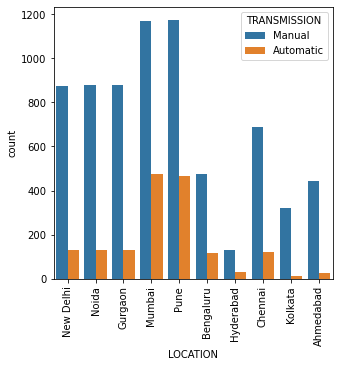

In [96]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['LOCATION'],hue = df['TRANSMISSION'])
plt.xticks(rotation=90)
plt.show()

## Key Observations:
Maximum count of used cars are for Mumbai and Pune location.
Manual cars are more in count than Automatic one.

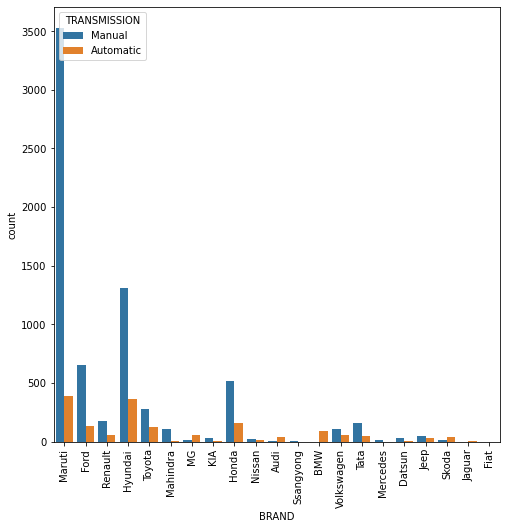

In [99]:
plt.figure(figsize = (8,8))
sns.countplot(x = df['BRAND'],hue = df['TRANSMISSION'])
plt.xticks(rotation=90)
plt.show()

## Key observations:
For used cars ,The most demanded brand is Maruti followed by Hyundai and Honda.
Manual cars are more in count,means more in demand than Automatic.

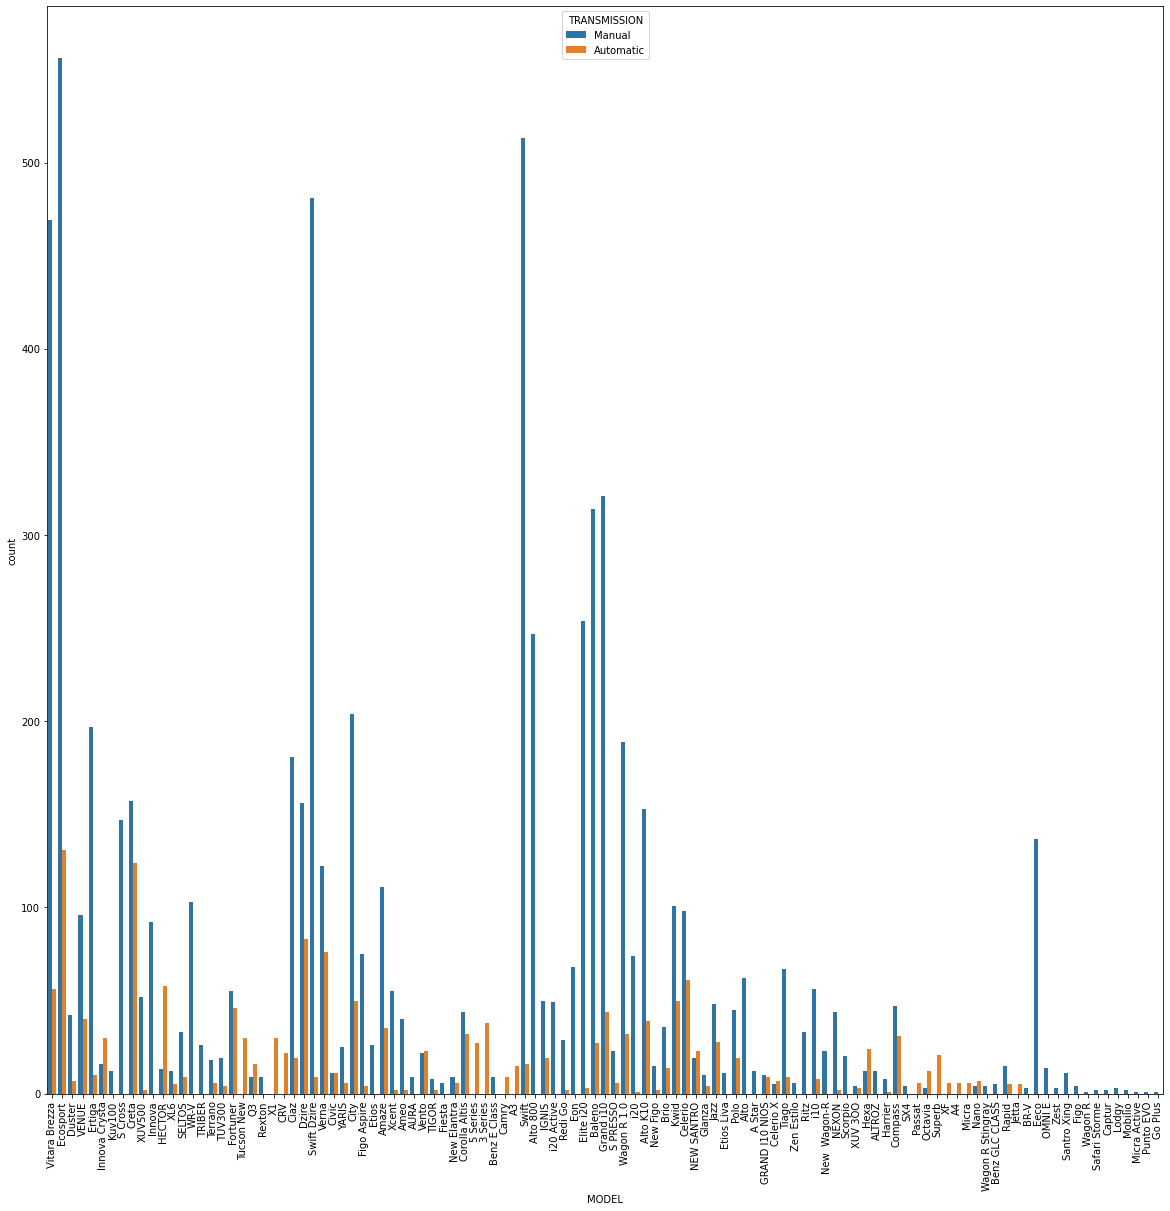

In [102]:
plt.figure(figsize = (20,20))
sns.countplot(x = df['MODEL'],hue = df['TRANSMISSION'])
plt.xticks(rotation=90)
plt.show()

## Key Observations:
Ecosport followed by swift and swift ,Dzire are more in counts than any other models for used cars.
Manual car is more in count than Automatic one.

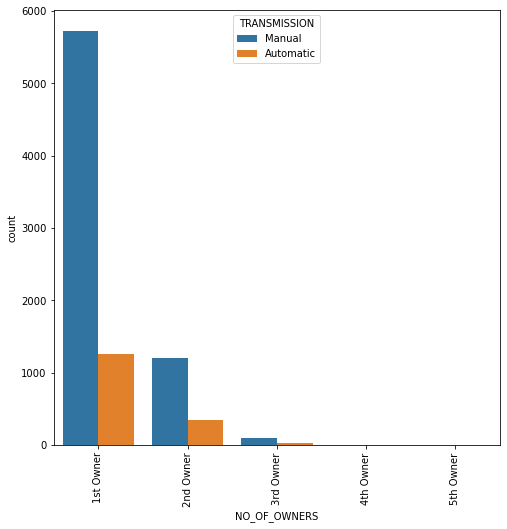

In [104]:
plt.figure(figsize = (8,8))
sns.countplot(x = df['NO_OF_OWNERS'],hue = df['TRANSMISSION'])
plt.xticks(rotation=90)
plt.show()

## Key Observations:
No one wants to become 4th owner or 5th owner.Very less people wants to become 3rd owner. Every one wants to be 1st owner.
Manual cars are more in count than automatic cars. 


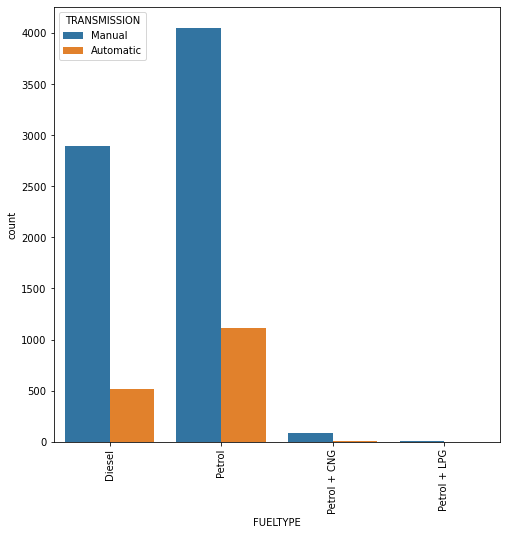

In [105]:
plt.figure(figsize = (8,8))
sns.countplot(x = df['FUELTYPE'],hue = df['TRANSMISSION'])
plt.xticks(rotation=90)
plt.show()

## Key observation
Petrol cars are more in counts followed by Diesel cars.
Manual cars are more in counts than automatic one.

In [106]:
df._get_numeric_data().columns

Index(['MNF_YEAR', 'DRIVEN_KM', 'PRICE'], dtype='object')

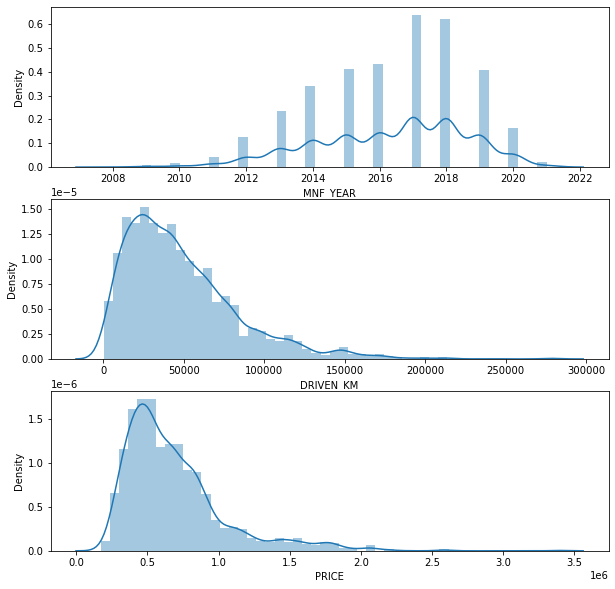

In [110]:
columns = ['MNF_YEAR', 'DRIVEN_KM', 'PRICE']
plt.figure(figsize = (10,10))
graph = 1
for i in columns:
    if graph <=3:
        plt.subplot(3,1,graph)
        sns.distplot(df[i])
        plt.xlabel(i)
        graph += 1
plt.show()        

DRIVEN_KM and PRICE are rightly skewed. 

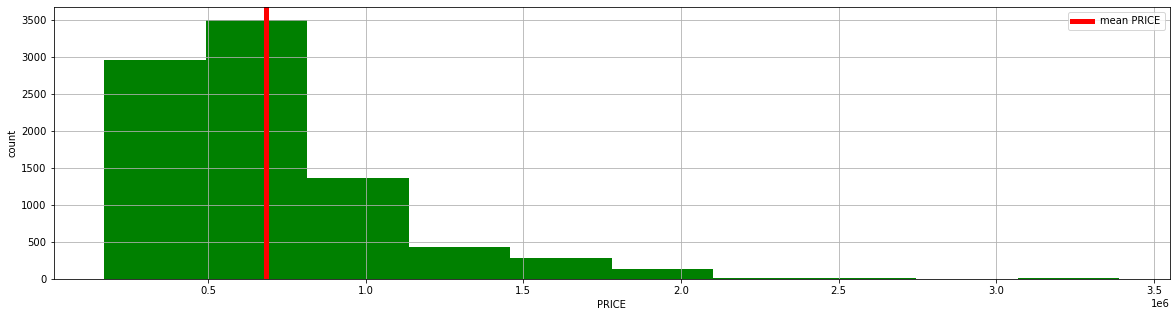

Statistical information of PRICE :
 count    8.668000e+03
mean     6.853229e+05
std      3.561293e+05
min      1.716990e+05
25%      4.406990e+05
50%      5.989990e+05
75%      8.208990e+05
max      3.388499e+06
Name: PRICE, dtype: float64


In [112]:
df.PRICE.hist(bins =10,figsize=(20,5), color ="green")
plt.axvline(np.mean(df.PRICE), linewidth = 5, color = "red", label = "mean PRICE")
plt.xlabel("PRICE")
plt.ylabel("count")
plt.legend()
plt.show()
print("Statistical information of PRICE :\n",\
      df.PRICE.describe())


## Key Observations
    Mean of the PRICE is  Rs:6,85,322.
    The PRICE is distributed between Rs:1,71,699 and Rs:33,88,499.
    Most of the car's price is lower than mean price.       

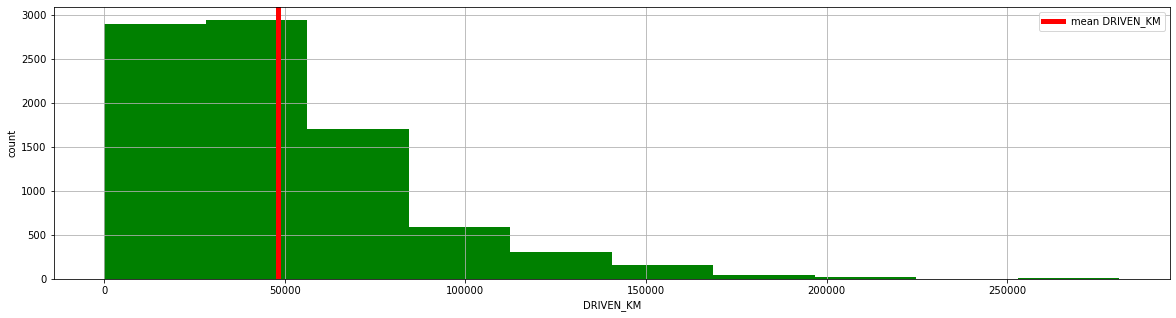

Statistical information of DRIVEN_KM :
 count      8668.000000
mean      48198.739386
std       35082.788099
min          58.000000
25%       22645.000000
50%       40677.000000
75%       65235.000000
max      280921.000000
Name: DRIVEN_KM, dtype: float64


In [116]:
df.DRIVEN_KM.hist(bins =10,figsize=(20,5), color ="green")
plt.axvline(np.mean(df.DRIVEN_KM), linewidth = 5, color = "red", label = "mean DRIVEN_KM")
plt.xlabel("DRIVEN_KM")
plt.ylabel("count")
plt.legend()
plt.show()
print("Statistical information of DRIVEN_KM :\n",\
      df.DRIVEN_KM.describe())


## Key Observations
Minimum driven km is 58 km and Maximum driven km is 280921 km.
Mean of driven km is 48198 km and most values are under 50,000 km.

# Bi-Variate Ananysis

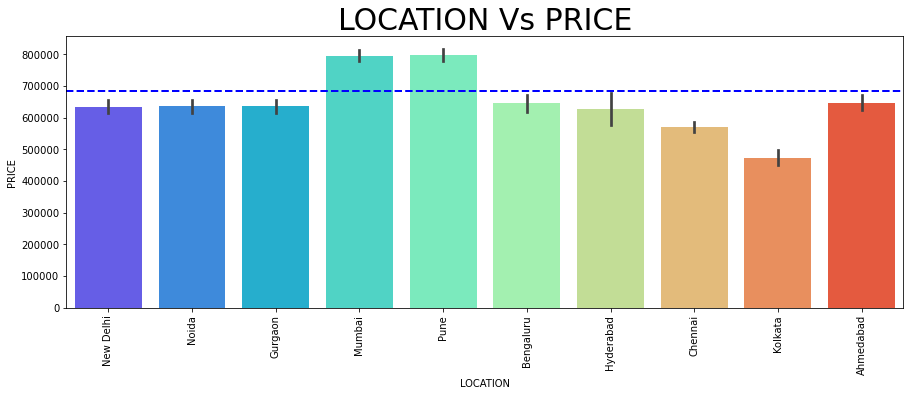

In [117]:
plt.figure(figsize=(15,5))
sns.barplot(x = "LOCATION",y = "PRICE", data = df, palette = "rainbow")
plt.axhline(np.mean(df.PRICE), color = "b", linestyle="dashed", linewidth=2)
plt.title("LOCATION Vs PRICE", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

## Key Observations :
Mumbai and Pune are the location,where counts of used cars are more than any other locations.
Kolkata is the location ,where least cars are sold and comparitively cheaper.

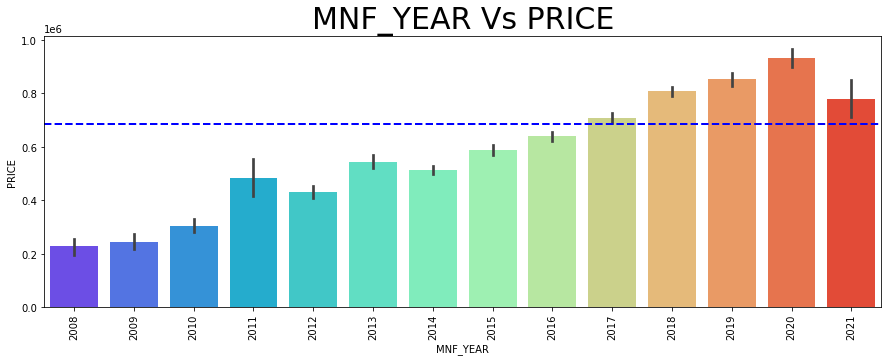

In [118]:
plt.figure(figsize=(15,5))
sns.barplot(x = "MNF_YEAR",y = "PRICE", data = df, palette = "rainbow")
plt.axhline(np.mean(df.PRICE), color = "b", linestyle="dashed", linewidth=2)
plt.title("MNF_YEAR Vs PRICE", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

## Key Obervations:
2020 is the year in which most used cars are sold followed by 2019.

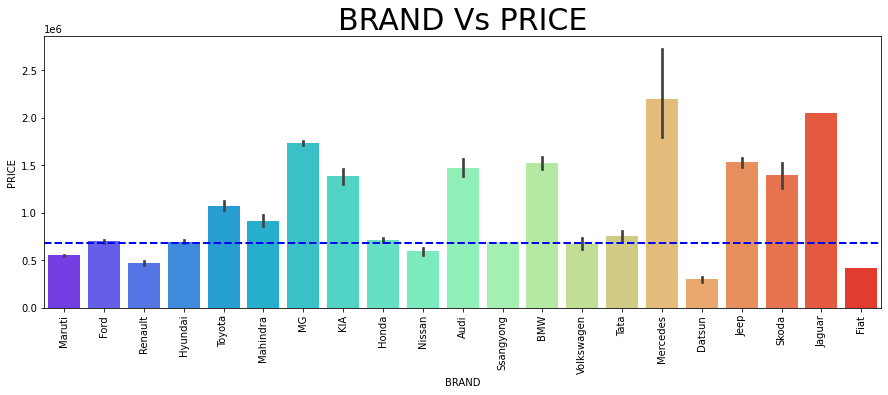

In [119]:
plt.figure(figsize=(15,5))
sns.barplot(x = "BRAND",y = "PRICE", data = df, palette = "rainbow")
plt.axhline(np.mean(df.PRICE), color = "b", linestyle="dashed", linewidth=2)
plt.title("BRAND Vs PRICE", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

Mercedes are the most costliest  used car followed by Jaguar.

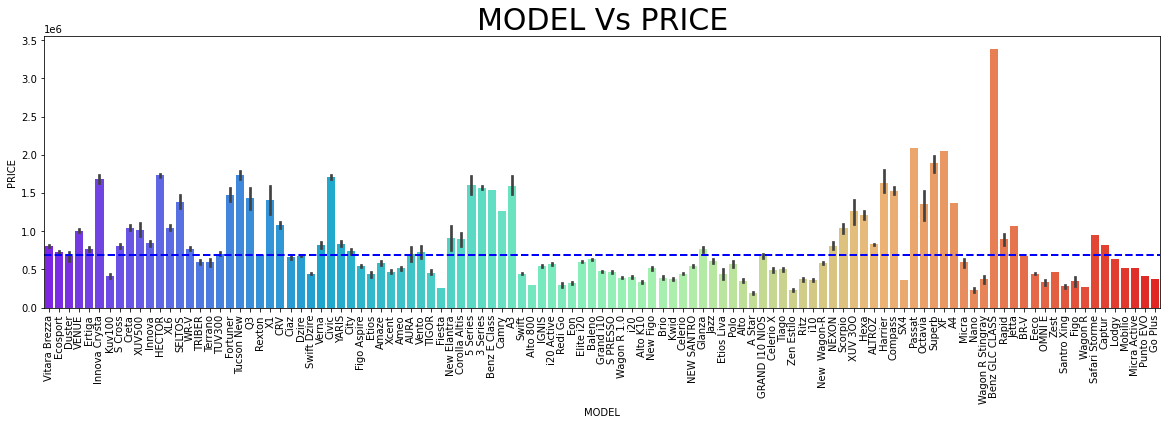

In [120]:
plt.figure(figsize=(20,5))
sns.barplot(x = "MODEL",y = "PRICE", data = df, palette = "rainbow")
plt.axhline(np.mean(df.PRICE), color = "b", linestyle="dashed", linewidth=2)
plt.title("MODEL Vs PRICE", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

Benz GLC CLASS model is most costliest model in used cars.

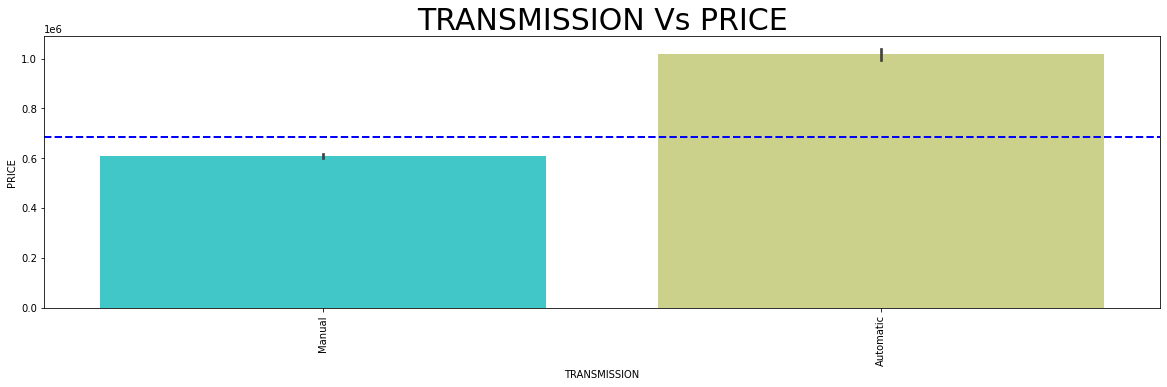

In [121]:
plt.figure(figsize=(20,5))
sns.barplot(x = "TRANSMISSION",y = "PRICE", data = df, palette = "rainbow")
plt.axhline(np.mean(df.PRICE), color = "b", linestyle="dashed", linewidth=2)
plt.title("TRANSMISSION Vs PRICE", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

In [ ]:
Automatic cars are costlier than Manual cars.

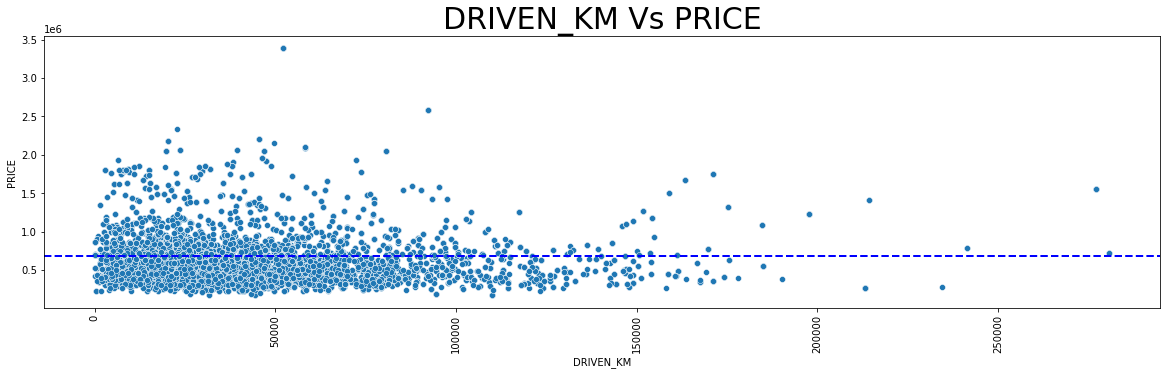

In [123]:
plt.figure(figsize=(20,5))
sns.scatterplot(x = "DRIVEN_KM",y = "PRICE", data = df, palette = "rainbow")
plt.axhline(np.mean(df.PRICE), color = "b", linestyle="dashed", linewidth=2)
plt.title("DRIVEN_KM Vs PRICE", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

## Key Observations:
DRIVEN_KM less than 80,000 km are costlier than DRIVEN_KM more than 80,000 km.

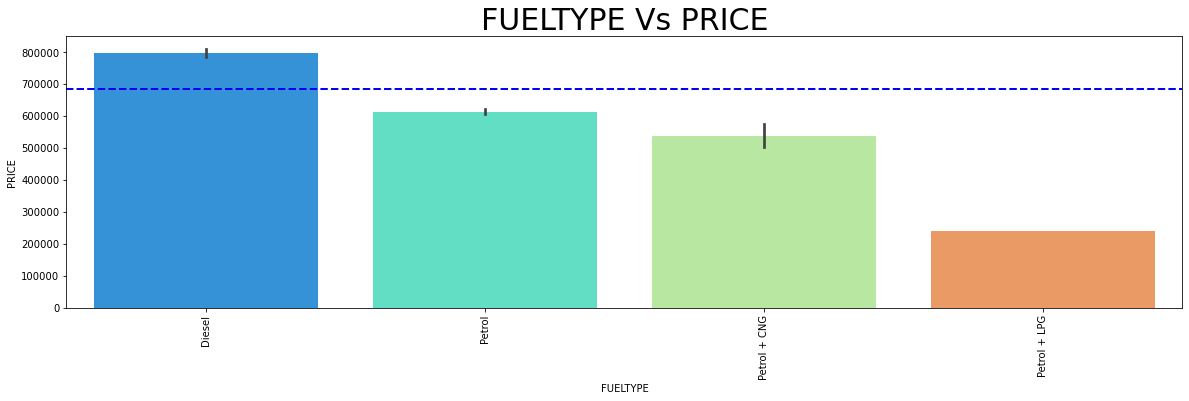

In [124]:
plt.figure(figsize=(20,5))
sns.barplot(x = "FUELTYPE",y = "PRICE", data = df, palette = "rainbow")
plt.axhline(np.mean(df.PRICE), color = "b", linestyle="dashed", linewidth=2)
plt.title("FUELTYPE Vs PRICE", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

# Key Observations
Diesel cars are costlier than petrol cars.

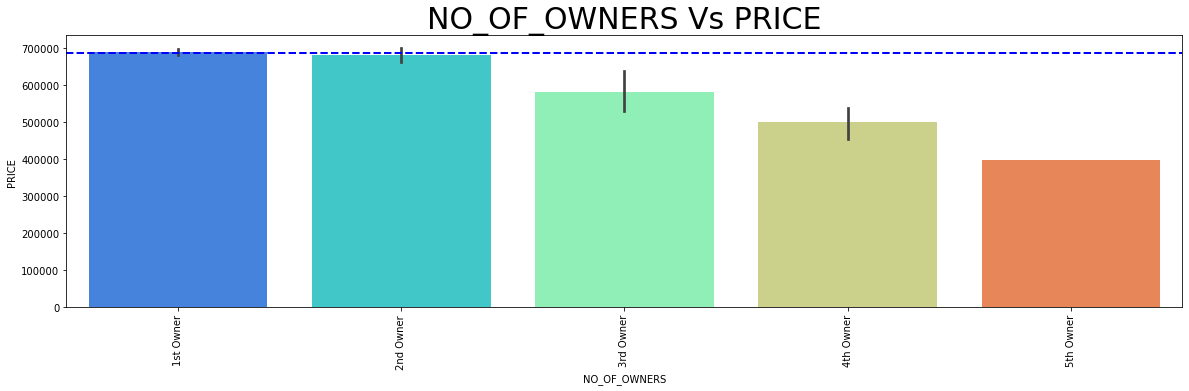

In [125]:
plt.figure(figsize=(20,5))
sns.barplot(x = "NO_OF_OWNERS",y = "PRICE", data = df, palette = "rainbow")
plt.axhline(np.mean(df.PRICE), color = "b", linestyle="dashed", linewidth=2)
plt.title("NO_OF_OWNERS Vs PRICE", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

1st owner cars are costlier followed by 2nd owner cars.

In [126]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns


Index(['LOCATION', 'BRAND', 'MODEL', 'VARIANT', 'TRANSMISSION', 'FUELTYPE',
       'NO_OF_OWNERS'],
      dtype='object')

In [240]:
## Label Encoding:
columns = ['MNF_YEAR','LOCATION','BRAND','MODEL','VARIANT','TRANSMISSION','FUELTYPE','NO_OF_OWNERS']
lec = LabelEncoder()
for i in columns:
    df[i] = df[i].astype('str')
    df[i]=  lec.fit_transform(df[i])


In [190]:
df

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,TRANSMISSION,DRIVEN_KM,FUELTYPE,NO_OF_OWNERS,PRICE
0,7,8,12,94,497,1,101529,0,0,655999
1,7,8,12,94,424,1,59773,0,0,666399
2,7,9,12,94,424,1,35231,0,0,684399
3,7,5,4,30,101,1,80946,0,1,409899
4,7,8,4,30,86,1,16212,1,0,741699
...,...,...,...,...,...,...,...,...,...,...
8663,0,11,12,31,172,1,26880,1,0,459599
8664,0,11,12,31,172,1,11882,1,0,461999
8665,0,9,4,30,101,1,71900,0,1,616799
8666,0,10,12,94,419,1,27460,0,0,816199


In [130]:
## Describing dataframe:
df.describe()

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,TRANSMISSION,DRIVEN_KM,FUELTYPE,NO_OF_OWNERS,PRICE
count,8668.000000,8668.000000,8668.000000,8668.000000,8668.000000,8668.000000,8668.000000,8668.000000,8668.000000,8.668000e+03
mean,5.454545,8.343793,9.993539,51.875635,300.817028,0.811606,48198.739386,0.616751,0.212160,6.853229e+05
std,2.879630,2.247455,4.480251,31.812803,155.202151,0.391049,35082.788099,0.508024,0.452017,3.561293e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,0.000000,1.716990e+05
25%,3.000000,7.000000,6.000000,27.000000,158.000000,1.000000,22645.000000,0.000000,0.000000,4.406990e+05
50%,6.000000,9.000000,12.000000,44.000000,324.000000,1.000000,40677.000000,1.000000,0.000000,5.989990e+05
75%,8.000000,10.000000,12.000000,84.000000,440.000000,1.000000,65235.000000,1.000000,0.000000,8.208990e+05
max,9.000000,13.000000,20.000000,110.000000,539.000000,1.000000,280921.000000,3.000000,4.000000,3.388499e+06


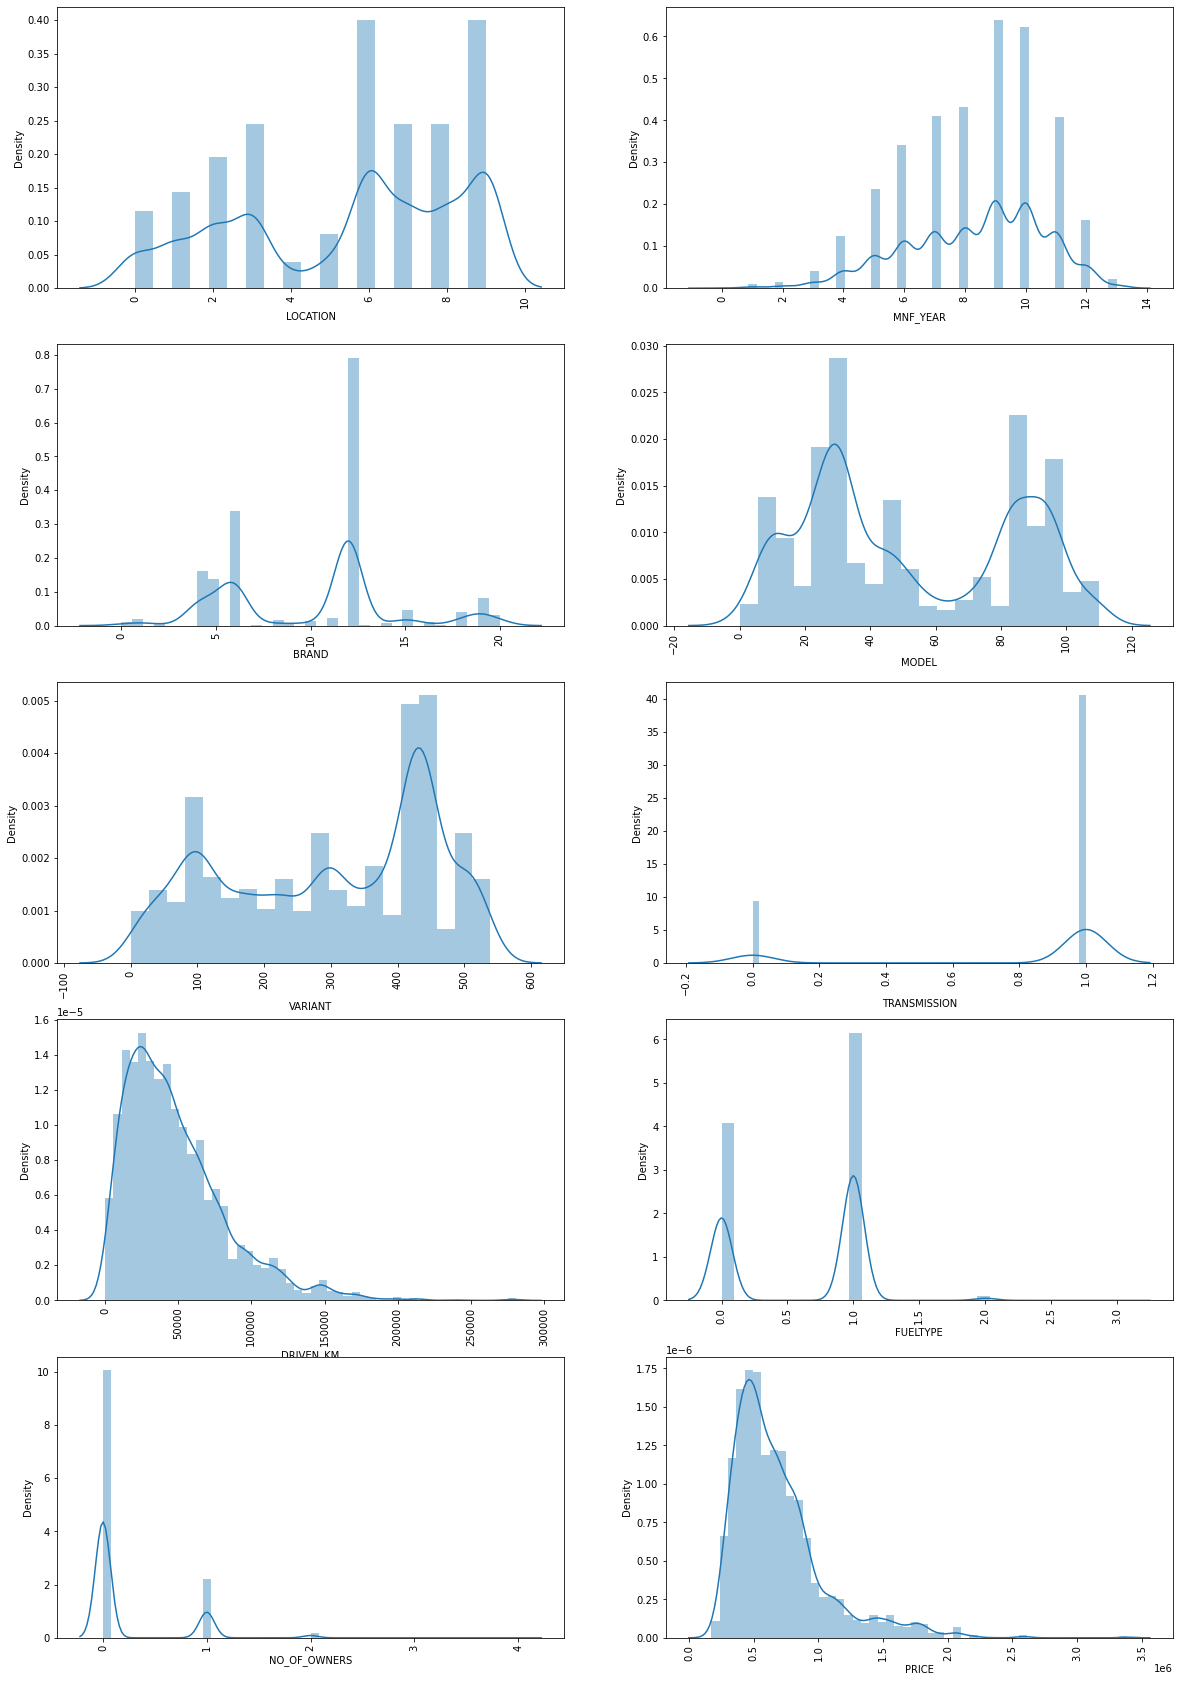

In [143]:
## Visualizing Distribution of Data:
plt.figure(figsize = (20,30))
graph  = 1
for i in df.columns:
    if graph <=10:
        plt.subplot(5,2,graph)
        sns.distplot(df[i])
        plt.xlabel(i)
        plt.xticks(rotation = 90)
        graph += 1
plt.show()        

# Correlation of Data :

In [131]:
df.corr()

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,TRANSMISSION,DRIVEN_KM,FUELTYPE,NO_OF_OWNERS,PRICE
LOCATION,1.000000,-0.055598,-0.014913,0.029206,0.014539,-0.102332,0.007473,-0.109392,-0.042274,0.139629
MNF_YEAR,-0.055598,1.000000,-0.010081,-0.099503,-0.071564,-0.156698,-0.493306,0.151792,-0.168800,0.373988
BRAND,-0.014913,-0.010081,1.000000,0.143886,0.433308,0.066149,0.130526,-0.062173,-0.061823,-0.062152
MODEL,0.029206,-0.099503,0.143886,1.000000,0.234503,0.080355,0.067657,-0.175509,-0.015994,-0.021679
VARIANT,0.014539,-0.071564,0.433308,0.234503,1.000000,0.105703,0.037156,-0.034675,-0.019747,-0.194721
TRANSMISSION,-0.102332,-0.156698,0.066149,0.080355,0.105703,1.000000,0.076192,-0.063216,-0.042783,-0.447728
DRIVEN_KM,0.007473,-0.493306,0.130526,0.067657,0.037156,0.076192,1.000000,-0.427314,0.061661,-0.050042
FUELTYPE,-0.109392,0.151792,-0.062173,-0.175509,-0.034675,-0.063216,-0.427314,1.000000,-0.014674,-0.253148
NO_OF_OWNERS,-0.042274,-0.168800,-0.061823,-0.015994,-0.019747,-0.042783,0.061661,-0.014674,1.000000,-0.030471
PRICE,0.139629,0.373988,-0.062152,-0.021679,-0.194721,-0.447728,-0.050042,-0.253148,-0.030471,1.000000


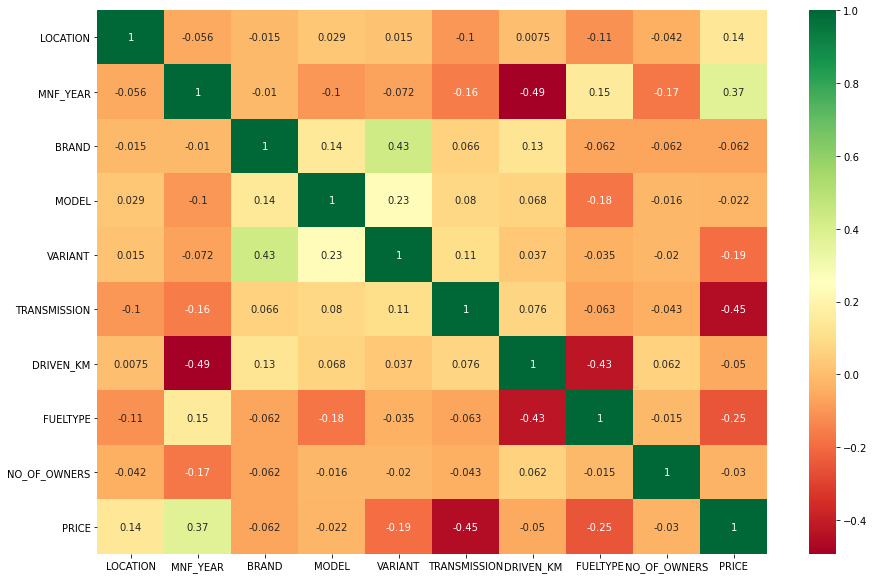

In [136]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True, cmap = 'RdYlGn' )
plt.show()

# Correlation of features with target variable

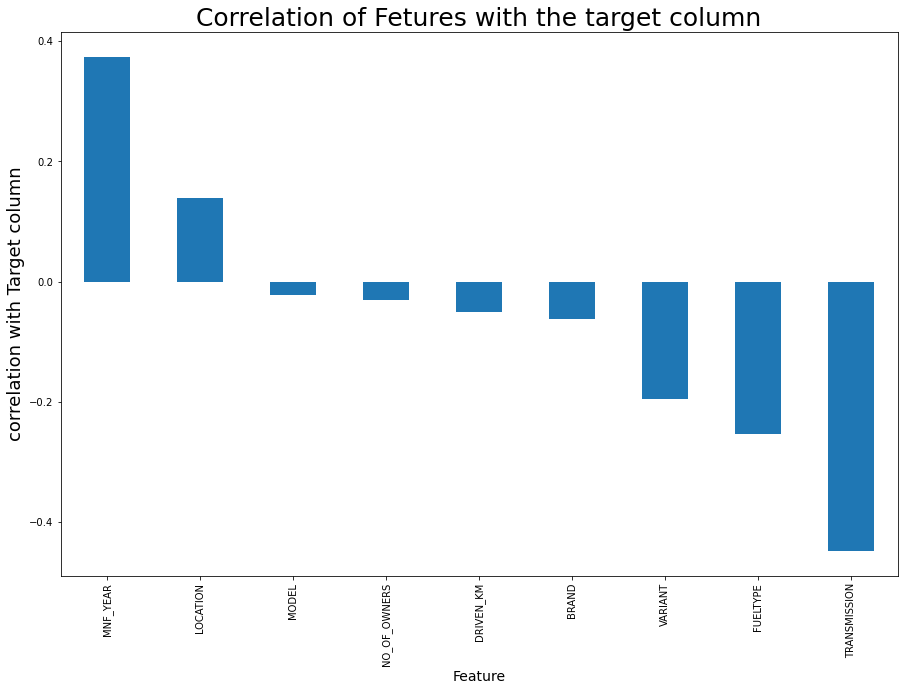

KEY OBSERVATIONS:
 


,PRICE
MNF_YEAR,0.373988
LOCATION,0.139629
MODEL,-0.021679
NO_OF_OWNERS,-0.030471
DRIVEN_KM,-0.050042
BRAND,-0.062152
VARIANT,-0.194721
FUELTYPE,-0.253148
TRANSMISSION,-0.447728


In [138]:
plt.figure(figsize=(15,10))
df.corr()["PRICE"].sort_values(ascending=False).drop(["PRICE"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
corr=pd.DataFrame(df.corr()["PRICE"].sort_values(ascending=False)).drop(["PRICE"])
print("KEY OBSERVATIONS:\n ")
corr


MNF_YEAR and LOCATION have positive relationship with Target.
MODEL,NO_OF_OWNERS,DRIVEN_KM,BRAND,VARIANT, FUELTYPE,TRANSMISSION have negative correlation with Target. 

# Checking Outliers using Box Plot

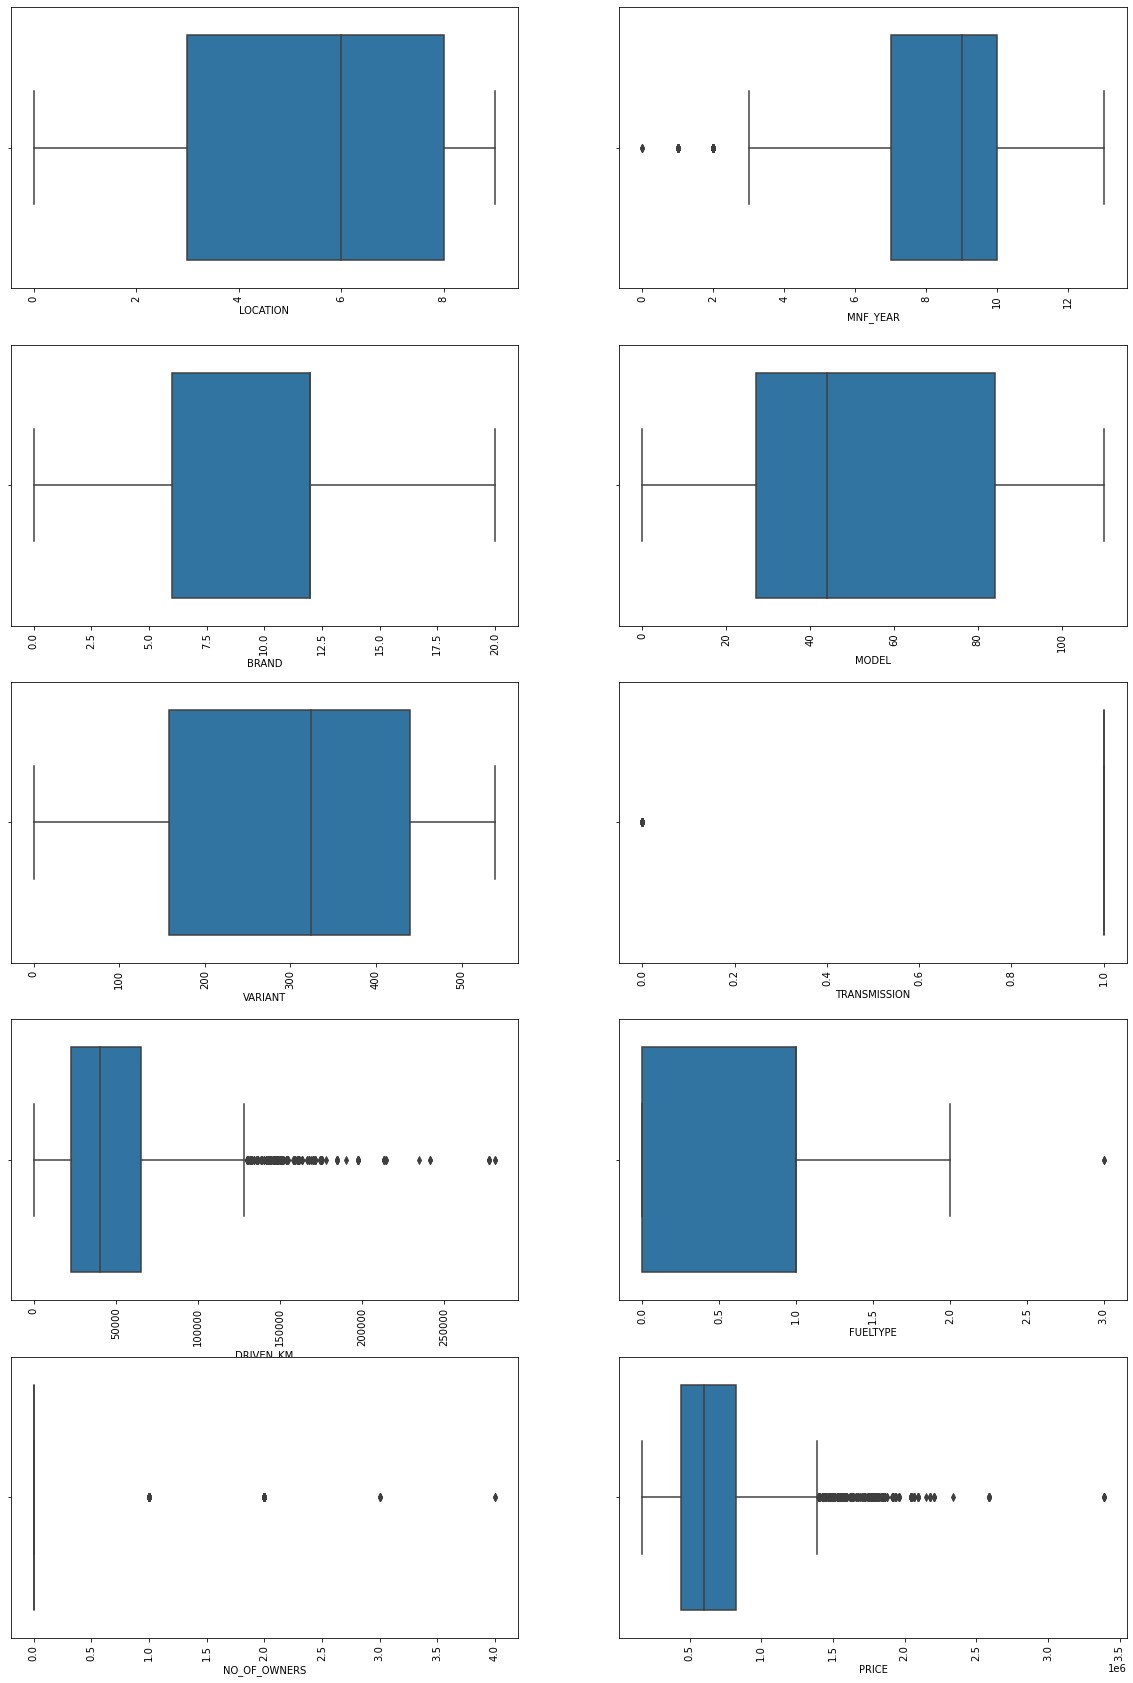

In [144]:
## Visualizing Distribution of Data:
plt.figure(figsize = (20,30))
graph  = 1
for i in df.columns:
    if graph <=10:
        plt.subplot(5,2,graph)
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.xticks(rotation = 90)
        graph += 1
plt.show()        

Apart from PRICE ,only DRIVEN_KM has continuous data,which is rightly skewed. Price is target variable. So doing log transformation for DRIVEN_KM column data.

In [241]:
df['DRIVEN_KM'] = np.log(df['DRIVEN_KM'])

<AxesSubplot:xlabel='DRIVEN_KM', ylabel='Density'>

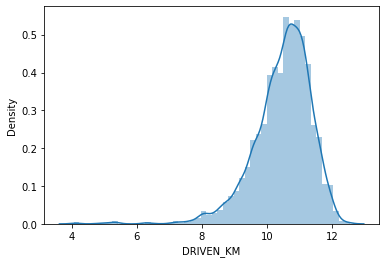

In [146]:
sns.distplot(df['DRIVEN_KM'])

In [ ]:
Since we have very less data and distributions are almost normal.So I am not removing outliers.

# Skewness

In [147]:
df.skew()

LOCATION       -0.403131
MNF_YEAR       -0.462373
BRAND           0.190042
MODEL           0.241976
VARIANT        -0.330499
TRANSMISSION   -1.594060
DRIVEN_KM      -1.402540
FUELTYPE       -0.220277
NO_OF_OWNERS    2.083213
PRICE           1.811769
dtype: float64

In [242]:
#Except DRIVEN_KM and PRICE ,all are categorical columns. PRICE is target variable,so will remove skewness from DRIVEN_KM.
from sklearn.preprocessing import PowerTransformer
skewed_features = ['DRIVEN_KM']
scaler = PowerTransformer(method='yeo-johnson')

In [243]:
df[skewed_features] = scaler.fit_transform(df[skewed_features].values)
df[skewed_features].head()


,DRIVEN_KM
0,1.400642
1,0.552685
2,-0.163707
3,1.021060
4,-1.012395


In [194]:
df['DRIVEN_KM'].skew()

-0.0221194449402971

# Separating Features and Target

In [244]:
x = df.drop('PRICE',axis=1)
y= df['PRICE']

In [245]:
x.shape,y.shape

((8668, 9), (8668,))

# Generalizing data using Standard Scaler

In [246]:
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,TRANSMISSION,DRIVEN_KM,FUELTYPE,NO_OF_OWNERS
0,0.536716,-0.152979,0.447871,1.324209,1.264121,0.481794,1.400642,-1.214091,-0.469389
1,0.536716,-0.152979,0.447871,1.324209,0.793740,0.481794,0.552685,-1.214091,-0.469389
2,0.536716,0.291995,0.447871,1.324209,0.793740,0.481794,-0.163707,-1.214091,-0.469389
3,0.536716,-1.487899,-1.337846,-0.687676,-1.287537,0.481794,1.021060,-1.214091,1.743043
4,0.536716,-0.152979,-1.337846,-0.687676,-1.384191,0.481794,-1.012395,0.754435,-0.469389
...,...,...,...,...,...,...,...,...,...
8663,-1.894292,1.181941,0.447871,-0.656240,-0.830043,0.481794,-0.485204,0.754435,-0.469389
8664,-1.894292,1.181941,0.447871,-0.656240,-0.830043,0.481794,-1.292932,0.754435,-0.469389
8665,-1.894292,0.291995,-1.337846,-0.687676,-1.287537,0.481794,0.832749,-1.214091,1.743043
8666,-1.894292,0.736968,0.447871,1.324209,0.761522,0.481794,-0.460878,-1.214091,-0.469389


# Model Building

In [247]:
## Finding Best Random State
score = 0
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .30, random_state = i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    tempscore = r2_score(y_test,y_pred)
    if tempscore > score:
        score= tempscore
        best_rstate=i

print(f"Best Accuracy {score*100} found on randomstate {best_rstate}")


Best Accuracy 98.99875135121317 found on randomstate 42


In [248]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .30, random_state = best_rstate)

In [249]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
lasso = Lasso()
ridge  = Ridge(alpha=1, random_state=42)

In [250]:
algo=[lr,dtr,rf,knn,AdaBoost,lasso,ridge]
acc_models={}
for model in algo:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("-"*60)
    acc_models[model]=round(r2_score(y_test,y_pred)*100,1)
    print(f"The model {model} has:: \n\t Accuracy :: {round(r2_score(y_test,y_pred)*100,1)}% \n\t Mean Absolute Error is :: {mean_absolute_error(y_test,y_pred)} \n\t Mean Squared Error is :: {mean_squared_error(y_test,y_pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(y_test,y_pred))}")
    print("-"*100)
    print("\n")

------------------------------------------------------------
The model LinearRegression() has:: 
	 Accuracy :: 42.1% 
	 Mean Absolute Error is :: 188768.99240202524 
	 Mean Squared Error is :: 74191643571.21053 
	 Root Mean Squared Error is :: 272381.43029804825
----------------------------------------------------------------------------------------------------


------------------------------------------------------------
The model DecisionTreeRegressor() has:: 
	 Accuracy :: 99.0% 
	 Mean Absolute Error is :: 11411.457131872357 
	 Mean Squared Error is :: 1331473179.5463283 
	 Root Mean Squared Error is :: 36489.35707225229
----------------------------------------------------------------------------------------------------


------------------------------------------------------------
The model RandomForestRegressor() has:: 
	 Accuracy :: 99.0% 
	 Mean Absolute Error is :: 17703.94194540561 
	 Mean Squared Error is :: 1232877875.2522106 
	 Root Mean Squared Error is :: 35112.36071887

In [253]:
acc_models

{LinearRegression(): 42.1,
 DecisionTreeRegressor(): 99.0,
 RandomForestRegressor(): 99.0,
 KNeighborsRegressor(): 82.5,
 AdaBoostRegressor(): 56.7,
 Lasso(): 42.1,
 Ridge(alpha=1, random_state=42): 42.1}

In [ ]:
Maximum r2 score is for DecisionTreeRegressor and RandomForestRegressor.

# Cross Validation of the models

In [252]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,10):
        cvs=cross_val_score(model,x,y,cv=i)
        CVscore_[i]=cvs.mean()
        print(f"Mean CV Score of model {model}:: {cvs.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------


Mean CV Score of model LinearRegression():: 0.38618152890397095 at k-fold::2

Mean CV Score of model LinearRegression():: 0.3669453208713507 at k-fold::3

Mean CV Score of model LinearRegression():: 0.3349268715580617 at k-fold::4

Mean CV Score of model LinearRegression():: 0.34380219091641234 at k-fold::5

Mean CV Score of model LinearRegression():: 0.3505076895723003 at k-fold::6

Mean CV Score of model LinearRegression():: 0.36713955047258745 at k-fold::7

Mean CV Score of model LinearRegression():: 0.36374123008508064 at k-fold::8

Mean CV Score of model LinearRegression():: 0.37679186275494286 at k-fold::9


DecisionTreeRegressor()
-------------------------


Mean CV Score of model DecisionTreeRegressor():: 0.7879206301948349 at k-fold::2

Mean CV Score of model DecisionTreeRegressor():: 0.7772601310781067 at k-fold::3

Mean CV Score of model DecisionTreeRegressor():: 0.8709740188493236 at k-fold::4

Mean CV Score of model DecisionT

In [254]:
acc_value=list(acc_models.values ( ))

m=list(CVmodel.keys())

print("The least difference between the r2-score and CV score of each model is::\n")
for i in range(5):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-acc_value[i]),2)}")

The least difference between the r2-score and CV score of each model is::

LinearRegression()::3.48
DecisionTreeRegressor()::7.65
RandomForestRegressor()::3.19
KNeighborsRegressor()::8.72
AdaBoostRegressor()::9.46


 Here for model RandomForest Regressor we get the least value i.e. the difference between the r2-score and cvScore of this model is 0.25 . So, RandomForest Regressor is the best model to use for this problem.

# Plotting regplot graph for Random Forest Regressor model

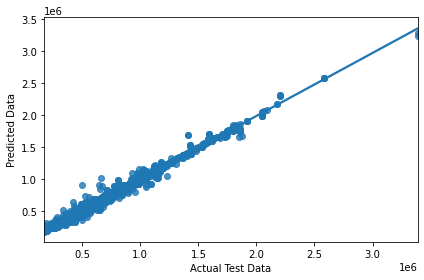

In [255]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
sns.regplot(y_test,y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we can see that the data points are very close to the best fit line. That means the residual is less.So I'll do hyperparameter tuning for Random Forest.

# HyperParameter Tuning

In [256]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=best_rstate)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(x_train,y_train)
final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 180 candidates, totalling 900 fits


RandomForestRegressor(bootstrap=False, max_features='sqrt', random_state=42)

In [257]:
## Providing hyperparameters to model:-
rfr = RandomForestRegressor(bootstrap=False,max_features='sqrt', random_state=42 )
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
score =  r2_score(y_test,y_pred)
score

0.9939595641499511

In [ ]:
After Hyperparameter tuning score has increased.

# Saving the Model

In [258]:
import pickle
filename = 'Used_Car_Prediction.pickle'
pickle.dump(rfr,open(filename,'wb'))

# Conclusion

In [259]:
a = np.array(y_test)
predicted = np.array(rfr.predict(x_test))
new_df = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
new_df


,Original,Predicted
0,585799,581552.0
1,951399,892896.0
2,723599,723599.0
3,672199,672199.0
4,669999,669999.0
...,...,...
2596,599999,616431.0
2597,666999,660395.0
2598,495299,495299.0
2599,303199,303199.0


The above model will help our seller to predict the Price of the used cars, and also will helps them to understand based on  factors that affect car's pricing.